# Testing meanshift
We have testet meanshift to see how many clusters we get

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

In [220]:
df = pd.read_csv("data/combined.csv")
print(df.head())
df.shape

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
0    -4.095           1       0.0294  167.060               4          0.474   
1    -

(14006, 18)

In [221]:
data = df.drop(["song_name",
                    "song_popularity",
                    "song_duration_ms",
                    "key",
                    "loudness",
                    "audio_mode",
                    "tempo",
                    "time_signature",
                    "playlist",
                    "album_names",
                    "artist_name",], axis=1)

df.shape

(14006, 18)

In [222]:
def find_meanshift(data):
    bandwidth = estimate_bandwidth(data, quantile=0.2)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    clusters = ms.cluster_centers_
    labels = ms.labels_
    number_clusters = len(clusters)
    return ms, labels, clusters, number_clusters

In [223]:
meanshift_model, labels, clusters, number_clusters = find_meanshift(data)
print(clusters)
print(number_clusters)

[[0.13223754 0.65354316 0.72226207 0.01288677 0.16553618 0.10350424
  0.57819802]
 [0.05815889 0.62678495 0.73498387 0.65874597 0.16680833 0.06895269
  0.44154046]
 [0.91059716 0.44625095 0.1597478  0.8750545  0.12064431 0.06359573
  0.1979154 ]
 [0.516      0.723      0.8995     0.6815     0.5195     0.761
  0.5835    ]]
4


In [224]:
"""df = pd.read_csv("data/song_info.csv")
df = df.head()
songlist = []
for idx, row in df.iterrows():
    songlist.append(row["song_name"] + " - " + row["artist_name"])

songlist"""

'df = pd.read_csv("data/song_info.csv")\ndf = df.head()\nsonglist = []\nfor idx, row in df.iterrows():\n    songlist.append(row["song_name"] + " - " + row["artist_name"])\n\nsonglist'

## Recommend songs: meanshift vs. kmeans
When using meanshift, we get 4 clusters. In kmeans we get to decide how many clusters we want and by 
using the elbow method, we figured out that we can use around 75 clusters

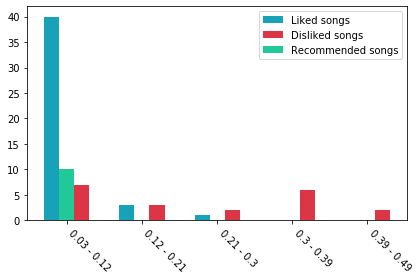

In [225]:
import song_recommender

liked = [1, 2, 4, 5,6, 9, 15, 27, 132, 135, 360, 388, 417, 444, 456, 567, 588, 599, 600, 612, 614, 617, 630, 643, 700, 890, 900, 916, 933, 934, 935, 1000, 1001, 1002, 1003, 2345, 2346, 2347, 2348, 2349, 3000, 3654, 3987, 3977]

disliked = [13099, 13999, 13130, 4000, 4001, 4002, 4003, 4004, 4005, 4006, 4007, 4008, 4009, 4030, 5679, 6789, 9876, 8765, 7654, 6543]

# Kmeans
recommeded, plot1, plot2 = song_recommender.recommend_songs(liked, disliked)


In [226]:
recommeded

[Song('Light On', 'Maggie Rogers', 69, 'Light On'),
 Song('History', 'Olivia Holt', 73, 'Olivia'),
 Song('The First Big Weekend', 'Arab Strap', 39, 'Ten Years of Tears'),
 Song('Mayestahlushi (feat. Abla Fahita)', 'Hassan El Shafei', 25, 'Mayestahlushi (feat. Abla Fahita)'),
 Song('Fumo Da Solo', 'Izi', 76, 'Fumo Da Solo'),
 Song('Loving Is Easy', 'Rex Orange County', 80, 'Loving Is Easy'),
 Song('Roses', 'OutKast', 72, 'Speakerboxxx/The Love Below'),
 Song('FOR WHICH I DANCE', 'Yoshi Flower', 37, 'AMERICAN RAVER'),
 Song('I Go Crazy', 'Orla Gartland', 48, 'I Go Crazy'),
 Song('Miss Me More', 'Kelsea Ballerini', 66, 'Unapologetically')]

In [227]:
liked_songs = df.iloc[liked]
res = liked_songs.mean()

In [228]:
cluster = meanshift_model.predict([res])[0]
cluster_df = df
cluster_df["cluster"] = labels

#cluster_df["cluster"] = meanshift_model.labels_
recommended_cluster = cluster_df[cluster_df.cluster == cluster]

recommended_cluster = recommended_cluster.drop(
    index=list(liked+disliked), errors="ignore"
)

recommeded_songs = recommended_cluster.iloc[
    (recommended_cluster["tempo"] - liked_songs["tempo"].mean()).abs().argsort().head(10)
]

ValueError: cannot copy sequence with size 14006 to array axis with dimension 7